# Classification Assignment


## **Task has been mentioned at the end of this notebook**  

## 1. Basic Pandas Operations

In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the dataset and display the head. You will get the output as mentioned below

X = pd.read_csv("C:\\Users\\saism\\Documents\\Projects\\ML Project\\1426203-Task_-_3_(Apply_Classification_Algorithm)\\Task - 3 (Apply Classification Algorithm)\\X_final.csv")
y = pd.read_csv("C:\\Users\\saism\\Documents\\Projects\\ML Project\\1426203-Task_-_3_(Apply_Classification_Algorithm)\\Task - 3 (Apply Classification Algorithm)\\y_final.csv")
X.head()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,-0.851807,1,1,0.275501,0.385452,0,0.918760,0.407927,0.408441,-0.444263,0,1,0,0,0,0,0,0,0
1,-1.050558,0,1,-1.135422,-1.012404,0,0.918760,0.407927,0.739534,-0.693798,1,0,0,0,0,0,0,0,0
2,0.166524,1,1,0.334290,0.443696,0,-1.558596,0.407927,-0.088198,-0.432618,1,0,0,0,0,0,0,0,0
3,-0.070852,1,1,1.039752,1.142624,0,0.564852,0.407927,-1.247024,1.017676,0,0,0,1,0,0,0,0,0
4,1.128673,1,1,-0.077230,0.035988,0,0.918760,0.407927,1.070627,-0.504817,0,1,0,0,0,0,0,0,0


## Observe that 24.59% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

## Model Building - SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
6. Compare the perormance of all the models

In [5]:
X.head()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,-0.851807,1,1,0.275501,0.385452,0,0.918760,0.407927,0.408441,-0.444263,0,1,0,0,0,0,0,0,0
1,-1.050558,0,1,-1.135422,-1.012404,0,0.918760,0.407927,0.739534,-0.693798,1,0,0,0,0,0,0,0,0
2,0.166524,1,1,0.334290,0.443696,0,-1.558596,0.407927,-0.088198,-0.432618,1,0,0,0,0,0,0,0,0
3,-0.070852,1,1,1.039752,1.142624,0,0.564852,0.407927,-1.247024,1.017676,0,0,0,1,0,0,0,0,0
4,1.128673,1,1,-0.077230,0.035988,0,0.918760,0.407927,1.070627,-0.504817,0,1,0,0,0,0,0,0,0


<AxesSubplot:>

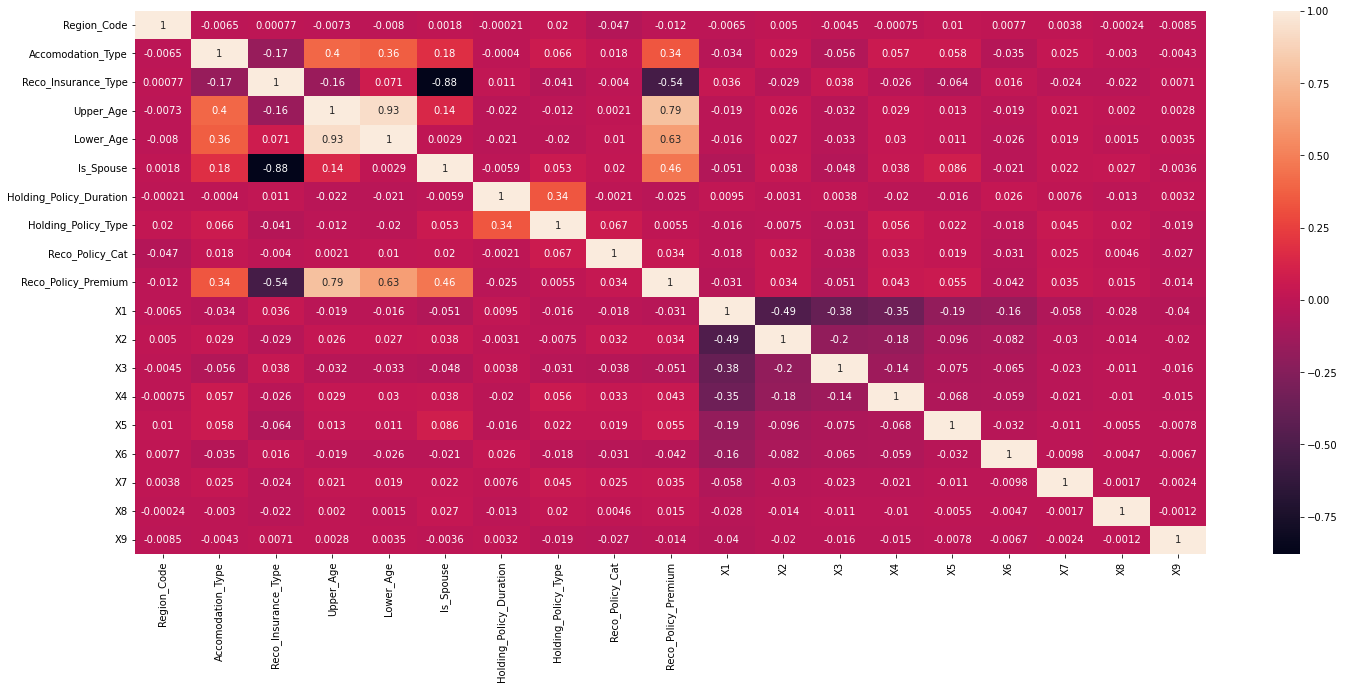

In [6]:
plt.figure(figsize=(24,10))
sns.heatmap(X.corr(),annot=True)


In [7]:
y.head()


,Response
0,0
1,0
2,0
3,0
4,0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Hyper Parameter Tunning

### Logistic Regression

In [9]:
parameters = {
   'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'C':[0.1,.01],
    'fit_intercept':[True,False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[10,100],
    'multi_class':['auto', 'ovr', 'multinomial']
}

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
lr_grid = GridSearchCV(lr,parameters,n_jobs=-1,scoring="accuracy",cv=10)
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.01], 'fit_intercept': [True, False],
                         'max_iter': [10, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [11]:
lr_grid.best_params_


{'C': 0.01,
 'fit_intercept': True,
 'max_iter': 10,
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'saga'}

In [12]:
lr = LogisticRegression(C = 0.01,
 fit_intercept = True,
 max_iter = 10,
 multi_class = 'multinomial',
 penalty =  'l1',
 solver =  'saga')

In [13]:
lr.fit(X_train,y_train)


LogisticRegression(C=0.01, max_iter=10, multi_class='multinomial', penalty='l1',
                   solver='saga')

In [14]:
y_pred = lr.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))


Accuracy => 0.5437693099897013
Precision => 0.5149606299212598
F-1 score => 0.5961713764813126
Confusion matrix =>
 [[201 308]
 [135 327]]
Recall score 0.7077922077922078


In [16]:
y_pred_proba_logistic = lr.predict_proba(X_test)
y_pred_proba_logistic

array([[0.44757613, 0.55242387],
       [0.43896153, 0.56103847],
       [0.4997458 , 0.5002542 ],
       ...,
       [0.48229885, 0.51770115],
       [0.49101959, 0.50898041],
       [0.58614951, 0.41385049]])

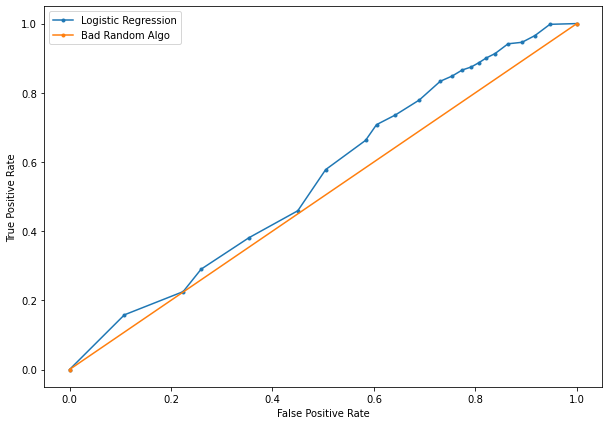

In [17]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

lr_prob = y_pred_proba_logistic[:,1]
lr_auc = roc_auc_score(y_test,lr_prob)   # logistic regression
lr_fpr,lr_tpr,thesholds = roc_curve(y_test,lr_prob)
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [18]:
print(f'Logistic Regression Accuracy is => {lr_auc}')


Logistic Regression Accuracy is => 0.5500918531370398


### SVC

In [19]:
parameters = {
    'kernel':['linear', 'poly', 'rbf'],
    'gamma':['scale', 'auto'] 
    
}


In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
svc_grid = GridSearchCV(svc,parameters,n_jobs=-1,scoring="accuracy",cv=10)
svc_grid.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [21]:
svc_grid.best_params_


{'gamma': 'auto', 'kernel': 'poly'}

In [22]:
from sklearn.svm import SVC
svc = SVC(gamma='auto',kernel='rbf',probability=True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [23]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5190525231719877
Precision => 0.49676584734799484
F-1 score => 0.6218623481781377
Confusion matrix =>
 [[120 389]
 [ 78 384]]
Recall score 0.8311688311688312


In [24]:
y_pred_proba_svc = svc.predict_proba(X_test)
y_pred_proba_svc

array([[0.44415782, 0.55584218],
       [0.42572676, 0.57427324],
       [0.54443094, 0.45556906],
       ...,
       [0.42229407, 0.57770593],
       [0.42073649, 0.57926351],
       [0.69373453, 0.30626547]])

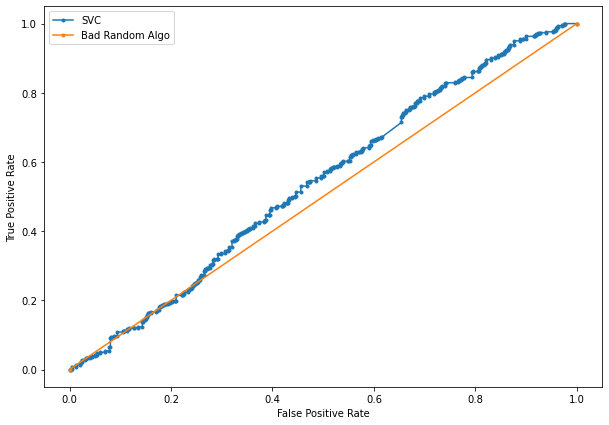

In [25]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

svc_prob = y_pred_proba_svc[:,1]
svc_auc = roc_auc_score(y_test,svc_prob)   
svc_fpr,svc_tpr,thesholds = roc_curve(y_test,svc_prob)
plt.plot(svc_fpr,svc_tpr,marker='.',label='SVC')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [26]:
print(f'SVC Accuracy is => {svc_auc}')


SVC Accuracy is => 0.5414572330092959


### KNN

In [27]:
parameters = {
   'weights':['uniform', 'distance'],
   'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] 
}

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn,parameters,n_jobs=-1,scoring="accuracy",cv=10)
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [29]:
knn_grid.best_params_


{'algorithm': 'auto', 'weights': 'uniform'}

In [30]:
knn = KNeighborsClassifier(algorithm='auto',weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [31]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5118434603501545
Precision => 0.4883720930232558
F-1 score => 0.5153374233128833
Confusion matrix =>
 [[245 264]
 [210 252]]
Recall score 0.5454545454545454


In [32]:
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_knn

array([[0.18010701, 0.81989299],
       [0.14473345, 0.85526655],
       [0.19410922, 0.80589078],
       ...,
       [0.38415911, 0.61584089],
       [0.19849737, 0.80150263],
       [0.80082895, 0.19917105]])

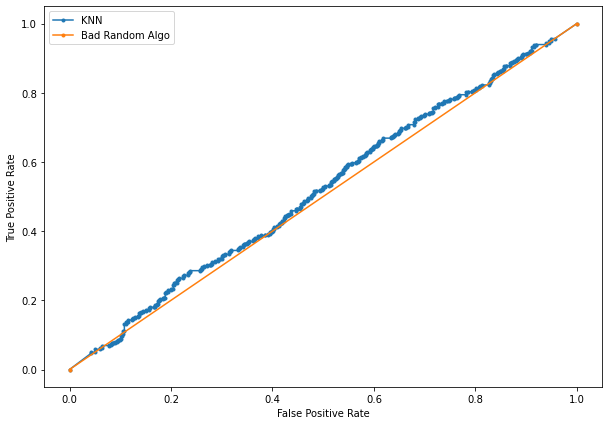

In [33]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))] 
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

knn_prob = y_pred_proba_knn[:,1]
knn_auc = roc_auc_score(y_test,knn_prob)  
knn_fpr,knn_tpr,thesholds = roc_curve(y_test,knn_prob)
plt.plot(knn_fpr,knn_tpr,marker='.',label='KNN')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [34]:
print(f'KNN Accuracy is => {knn_auc}')


KNN Accuracy is => 0.5201183884877402


### Decision Tree

In [35]:
parameters = {
   'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_features':[int, float,'auto', 'sqrt', 'log2']
    
}

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier()
dtree_grid = GridSearchCV(dtree,parameters,n_jobs=-1,scoring="accuracy",cv=10)
dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [<class 'int'>, <class 'float'>,
                                          'auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [37]:
dtree_grid.best_params_


{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}

In [38]:
dtree = DecisionTreeClassifier(criterion='gini',max_features='sqrt',splitter='best')
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5386199794026777
Precision => 0.5151515151515151
F-1 score => 0.5151515151515151
Confusion matrix =>
 [[285 224]
 [224 238]]
Recall score 0.5151515151515151


### AUC Curve


In [40]:
y_pred_proba_dtree = dtree.predict_proba(X_test)
y_pred_proba_dtree

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

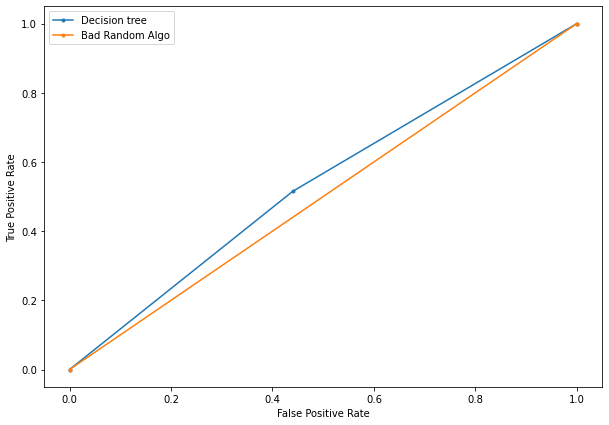

In [41]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

dtree_prob = y_pred_proba_dtree[:,1]
dtree_auc = roc_auc_score(y_test,dtree_prob)   # logistic regression
dtree_fpr,dtree_tpr,thesholds = roc_curve(y_test,dtree_prob)
plt.plot(dtree_fpr,dtree_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [42]:
print(f'Decision Tree Accuracy is => {dtree_auc}')


Decision Tree Accuracy is => 0.5375364648449128


### Random Forest


In [43]:
parameters = {
   'n_estimators':[10,100],
    'criterion':['gini', 'entropy'],
    'max_features':[int, float,'auto', 'sqrt', 'log2'],
    'bootstrap':[True,False],
    'ccp_alpha':[0.0,0.1]   
}

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rftree = RandomForestClassifier()
rftree_grid = GridSearchCV(rftree,parameters,n_jobs=-1,scoring="accuracy",cv=10)
rftree_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'ccp_alpha': [0.0, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [<class 'int'>, <class 'float'>,
                                          'auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             scoring='accuracy')

In [45]:
rftree_grid.best_params_


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'entropy',
 'max_features': 'log2',
 'n_estimators': 100}

In [46]:
rftree = RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.0,
 criterion= 'gini',
 max_features= 'sqrt',
 n_estimators= 100)
rftree.fit(X_train,y_train)
y_pred = rftree.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5345005149330587
Precision => 0.5096153846153846
F-1 score => 0.5397148676171079
Confusion matrix =>
 [[254 255]
 [197 265]]
Recall score 0.5735930735930735


### AUC Score

In [48]:
y_pred_proba_rfc = rftree.predict_proba(X_test)
y_pred_proba_rfc

array([[0.51, 0.49],
       [0.22, 0.78],
       [0.32, 0.68],
       ...,
       [0.62, 0.38],
       [0.34, 0.66],
       [0.6 , 0.4 ]])

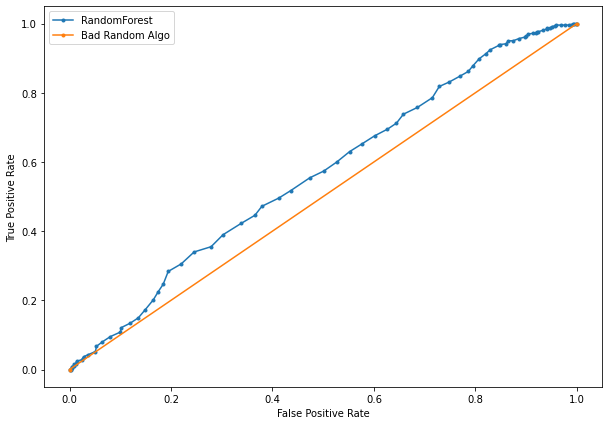

In [58]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

rfc_prob = y_pred_proba_rfc[:,1]
rfc_auc = roc_auc_score(y_test,rfc_prob)   
rfc_fpr,rfc_tpr,thesholds = roc_curve(y_test,rfc_prob)
plt.plot(rfc_fpr,rfc_tpr,marker='.',label='RandomForest')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [69]:
print(f'Random Forest Accuracy is => {rfc_auc}')


Random Forest Accuracy is => 0.5643524779084701


### Gradient Boosting

In [51]:
parameters = {
    'learning_rate':[0.1],
    'n_estimators':[10,100],
    'criterion':['friedman_mse', 'squared_error', 'mse', 'mae']
}

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
gbc_grid = GridSearchCV(gbc,parameters,n_jobs=-1,scoring="accuracy",cv=10)
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'learning_rate': [0.1], 'n_estimators': [10, 100]},
             scoring='accuracy')

In [53]:
gbc_grid.best_params_


{'criterion': 'mae', 'learning_rate': 0.1, 'n_estimators': 10}

In [54]:
gbc = GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, n_estimators= 10)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

In [55]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5458290422245108
Precision => 0.5148514851485149
F-1 score => 0.6227544910179641
Confusion matrix =>
 [[166 343]
 [ 98 364]]
Recall score 0.7878787878787878


In [56]:
y_pred_proba_gbc = gbc.predict_proba(X_test)
y_pred_proba_gbc

array([[0.48512604, 0.51487396],
       [0.39725587, 0.60274413],
       [0.44039691, 0.55960309],
       ...,
       [0.48512604, 0.51487396],
       [0.48512604, 0.51487396],
       [0.54466068, 0.45533932]])

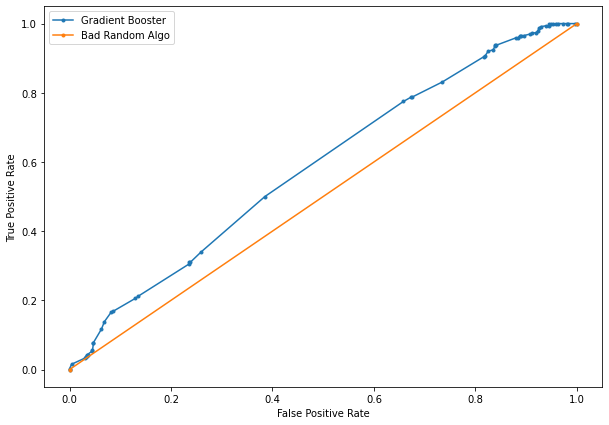

In [59]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

gbc_prob = y_pred_proba_gbc[:,1]
gbc_auc = roc_auc_score(y_test,gbc_prob)   
gbc_fpr,gbc_tpr,thesholds = roc_curve(y_test,gbc_prob)
plt.plot(gbc_fpr,gbc_tpr,marker='.',label='Gradient Booster')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [60]:
print(f'Gradient Boosting Accuracy is => {gbc_auc}')


Gradient Boosting Accuracy is => 0.5866289898706403


### Ada Boost

In [61]:
parameters = {
    'n_estimators':[10,50],
    'learning_rate':[0.1,0.2]
}

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

abc = AdaBoostClassifier()
abc_grid = GridSearchCV(abc,parameters,n_jobs=-1,scoring="accuracy",cv=10)
abc_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'n_estimators': [10, 50]},
             scoring='accuracy')

In [63]:
abc_grid.best_params_


{'learning_rate': 0.2, 'n_estimators': 50}

In [64]:
abc = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 50)
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

In [65]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5396498455200824
Precision => 0.5104895104895105
F-1 score => 0.6202209005947323
Confusion matrix =>
 [[159 350]
 [ 97 365]]
Recall score 0.79004329004329


In [66]:
y_pred_proba_abc = abc.predict_proba(X_test)
y_pred_proba_abc

array([[0.49462593, 0.50537407],
       [0.48210313, 0.51789687],
       [0.49462593, 0.50537407],
       ...,
       [0.49462593, 0.50537407],
       [0.49462593, 0.50537407],
       [0.51944373, 0.48055627]])

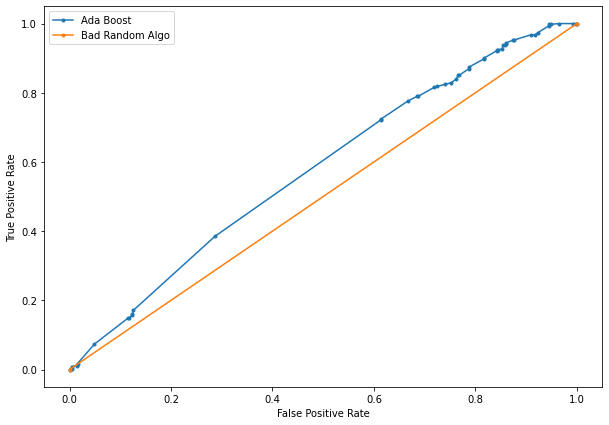

In [67]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))] 
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

abc_prob = y_pred_proba_abc[:,1]
abc_auc = roc_auc_score(y_test,abc_prob)
abc_fpr,abc_tpr,thesholds = roc_curve(y_test,abc_prob)
plt.plot(abc_fpr,abc_tpr,marker='.',label='Ada Boost')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [68]:
print(f'Ada Boost Accuracy is => {abc_auc}')


Ada Boost Accuracy is => 0.577647794248973
